 BOOK PRICES PREDICTION

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,SGDRegressor
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA

In [230]:
 
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [231]:
train_data=pd.read_excel('/content/gdrive/MyDrive/Data_Train.xlsx',na_values='NULL')
test_data=pd.read_excel('/content/gdrive/MyDrive/Data_Test.xlsx',na_values='NULL')
train_data[:5]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [232]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [233]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [234]:
y_train=train_data.Price.values
data=train_data[train_data.columns[:-1]].append(test_data)
data.shape

(7797, 8)

In [235]:
data.tail(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
1557,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"
1559,Complete Spanish Step-by-Step,Barbara Bregstein,"Paperback,– 16 Sep 2016",4.5 out of 5 stars,2 customer reviews,Learn Spanish with the most convenient and eff...,Dictionaries,"Language, Linguistics & Writing"


In [236]:
# Function To View Unique Entries
def unique(x,col):
    print(str(col)+': ',x[col].unique(),'\n'*2," Len:",len(x[col].unique()))
    

In [237]:
unique(data,'BookCategory')

BookCategory:  ['Action & Adventure' 'Biographies, Diaries & True Accounts' 'Humour'
 'Crime, Thriller & Mystery' 'Arts, Film & Photography' 'Sports'
 'Language, Linguistics & Writing' 'Computing, Internet & Digital Media'
 'Romance' 'Comics & Mangas' 'Politics'] 

  Len: 11


The BookCategory feature is an example of an ordinal Categorical Variable, We will use OneHotEncoding To Transform it to Numerical Feature

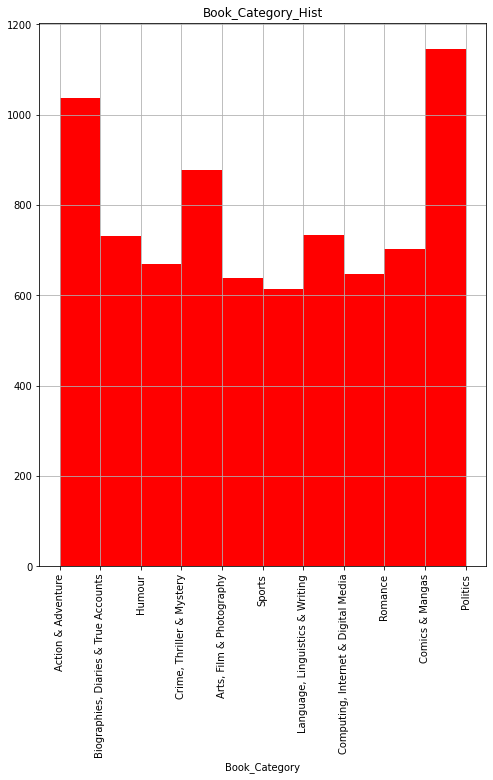

In [238]:
plt.figure(figsize=(8,10))
plt.hist(data.BookCategory,color='r')
plt.xticks(rotation=90)
plt.xlabel('Book_Category')
plt.title('Book_Category_Hist')
plt.grid('True')
plt.show()

The HistPlot Above shows that there are more books on "Action and Adventure" Than any other Category while "Politics" have the lowest number of books

In [240]:
b=data.Genre.values
c=[]
for x in b:
    c.append(str(x))
b,c=c,b

In [241]:
train_data.head(20)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [242]:
#AUTHOR
author=data.Author.values
unique(data,'Author')

Author:  ['Chris Kuzneski' 'Arun Khopkar' 'Thomas Hobbes' ...
 'Anton Pavlovich Chekhov' 'Monobina Gupta' 'Heinz Guderian'] 

  Len: 4372


In [243]:
#TITLE
#Check If Any Book is duplicated
len(data.Title.unique())

6787

In [244]:
#Edition
b=[];edition=[]
for x in data.Edition.values:
    b.append(x[:9])
for x in b:
    if x in 'Paperback':
        edition.append(0)
    elif x in 'Hardcover':
        edition.append(1)
    else:
        edition.append(2)
edition[:10]

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]

In [245]:
data['Edition_Type']=edition
data['Edition_Type'].value_counts()

0    6458
1    1056
2     283
Name: Edition_Type, dtype: int64

In [246]:
edition_date=[];b=[];day=[];year=[]
for x in data.Edition.values:
    edition_date.append(x[-11:])
edition_date=[x.strip() for x in edition_date]
for x in edition_date:
    b.append(x[:2])
b=[x.strip() for x in b]
for x in b:
    if x.isdigit():
        day.append(int(x))
    else:
        day.append(0)
day=[x/365 for x in day]
b=[]
for x in edition_date:
    b.append(x[-4:])
b=[x.strip() for x in b]
b[:10]
for x in b:
    if x.isdigit():
        year.append(int(x))
    else:
        year.append(0)
year[:10]
date=[]
for x in range(len(year)):
    date.append(day[x]+year[x])
date[:10]

[2016.027397260274,
 2012.0191780821917,
 1982.0684931506848,
 2017.013698630137,
 2006.027397260274,
 2009.013698630137,
 2017.013698630137,
 2018.0027397260274,
 2015.041095890411,
 2013.0712328767124]

In [247]:
data['Edition_Date']=date
data['Edition_Date'].replace([0],[data.Edition_Date.mean()],inplace=True)
data['Edition_Date']=data.Edition_Date-1900

In [248]:
data.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,0,116.027397
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",0,112.019178
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,0,82.068493
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",0,117.013699
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",1,106.027397
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,0,109.013699
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",0,117.013699
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,1,118.002740
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",0,115.041096
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,0,113.071233


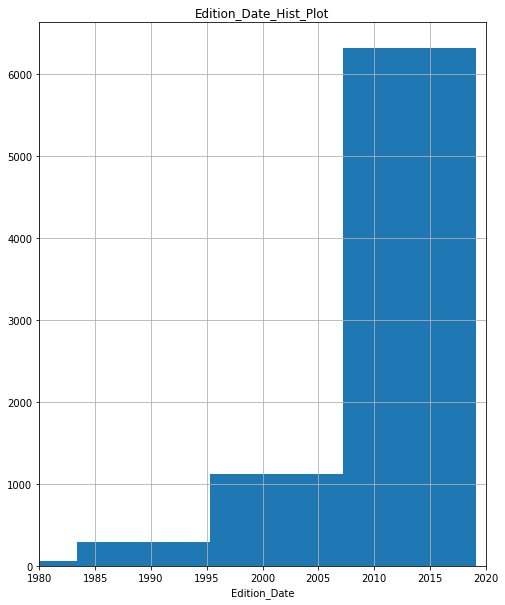

In [249]:
#Edition Date Plot
plt.figure(figsize=(8,10))
plt.hist(data.Edition_Date+1900)
plt.title('Edition_Date_Hist_Plot')
plt.xlabel('Edition_Date')
plt.xlim([1980,2020])
plt.grid('True')
plt.show()

In [250]:
#Reviews
reviews=[];b=[]
for x in data.Reviews:
    b.append(x[:3])
b=[x.strip() for x in b]
reviews=[float(x) for x in b]
reviews[:10]
data['Reviews']=reviews
data.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,0,116.027397
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",0,112.019178
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,0,82.068493
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",0,117.013699
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",1,106.027397


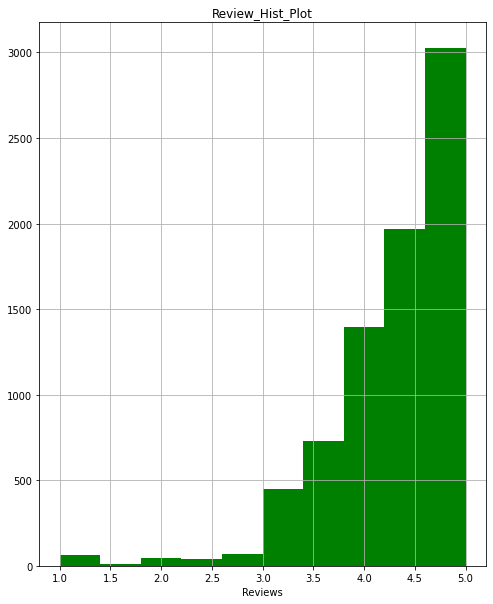

In [251]:
#Reviews
plt.figure(figsize=(8,10))
plt.hist(data.Reviews,color='g')
plt.xlabel('Reviews')
plt.title('Review_Hist_Plot')
plt.grid('True')
plt.show()

In [252]:
#RATINGS
ratings=[];b=[];c=[]
for x in data.Ratings:
    b.append(x[:2])
for x in range(len(b)):
    if b[x].isdigit():
            c.append(b[x])
    else:
        b[x]=b[x].replace(',',' ')
        c.append(b[x])
b=[x.strip() for x in c]
ratings=[int(x) for x in b]
ratings[:10]
data['Ratings']=ratings
data.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Type,Edition_Date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,0,116.027397
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",0,112.019178
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,0,82.068493
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",0,117.013699
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",1,106.027397
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5,8,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,0,109.013699
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4,72,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",0,117.013699
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7,16,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,1,118.002740
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2,11,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",0,115.041096
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0,1,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,0,113.071233


In [253]:
data.Ratings.value_counts()

1     1343
2      892
3      615
4      445
5      379
      ... 
88       4
91       4
81       4
78       3
94       3
Name: Ratings, Length: 99, dtype: int64

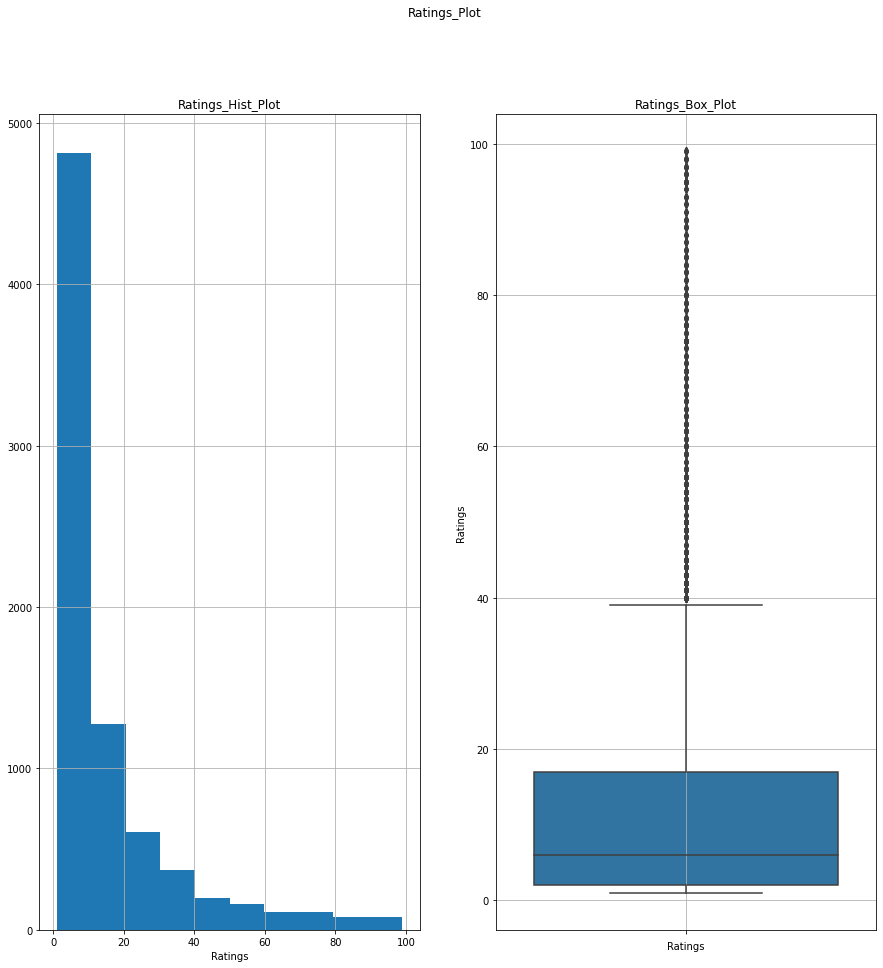

In [254]:
#Plot OF Customer Reviews
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
fig.suptitle('Ratings_Plot')
ax1.set_title('Ratings_Hist_Plot')
ax1.hist(x=data.Ratings)
ax1.set_xlabel('Ratings')
ax1.grid('True')
ax2.set_title('Ratings_Box_Plot')
sns.boxplot(y=data.Ratings,orient='v',ax=ax2)
ax2.set_xlabel('Ratings')
ax2.grid('True')
plt.show()

In [255]:
#Drop Uninformative Features
data.drop(['Title','Author','Edition','Synopsis','Genre'],axis=1,inplace=True)
print('Data_Shape: ',data.shape,'\n\n')
data.head(5)

Data_Shape:  (7797, 5) 




,Reviews,Ratings,BookCategory,Edition_Type,Edition_Date
0,4.0,8,Action & Adventure,0,116.027397
1,3.9,14,"Biographies, Diaries & True Accounts",0,112.019178
2,4.8,6,Humour,0,82.068493
3,4.1,13,"Crime, Thriller & Mystery",0,117.013699
4,5.0,1,"Arts, Film & Photography",1,106.027397


In [256]:
ratings_bin=sklearn.preprocessing.KBinsDiscretizer(n_bins=4,encode='ordinal')
ratings=ratings_bin.fit_transform(data.Ratings.values.reshape(-1,1))
ratings[:5]

array([[2.],
       [2.],
       [2.],
       [2.],
       [0.]])

In [257]:
data['Ratings']=ratings

In [258]:
data['Ratings_Reviews']=data['Ratings']*data['Reviews']

In [259]:
#Log Of some Features
col=['Ratings_Reviews','Edition_Date']
for x in col:
    data[x]=np.log10(data[x]+1)
data[:10]

,Reviews,Ratings,BookCategory,Edition_Type,Edition_Date,Ratings_Reviews
0,4.0,2.0,Action & Adventure,0,2.068288,0.954243
1,3.9,2.0,"Biographies, Diaries & True Accounts",0,2.053152,0.944483
2,4.8,2.0,Humour,0,1.919436,1.025306
3,4.1,2.0,"Crime, Thriller & Mystery",0,2.071932,0.963788
4,5.0,0.0,"Arts, Film & Photography",1,2.029495,0.000000
5,4.5,2.0,Sports,0,2.041447,1.000000
6,4.4,3.0,"Crime, Thriller & Mystery",0,2.071932,1.152288
7,4.7,2.0,Sports,1,2.075557,1.017033
8,4.2,2.0,"Biographies, Diaries & True Accounts",0,2.064612,0.973128
9,4.0,0.0,Action & Adventure,0,2.057176,0.000000


In [260]:
#Dummies for BookCategory
data=pd.get_dummies(data,columns=['BookCategory'],drop_first=True)
data.head(5)

,Reviews,Ratings,Edition_Type,Edition_Date,Ratings_Reviews,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,2.0,0,2.068288,0.954243,0,0,0,0,0,0,0,0,0,0
1,3.9,2.0,0,2.053152,0.944483,0,1,0,0,0,0,0,0,0,0
2,4.8,2.0,0,1.919436,1.025306,0,0,0,0,0,1,0,0,0,0
3,4.1,2.0,0,2.071932,0.963788,0,0,0,0,1,0,0,0,0,0
4,5.0,0.0,1,2.029495,0.000000,1,0,0,0,0,0,0,0,0,0


In [261]:
#Spliting Back into train amd test data
train=data.iloc[:train_data.shape[0]]
test=data.iloc[train_data.shape[0]:]
train['Prices']=y_train
train.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Reviews,Ratings,Edition_Type,Edition_Date,Ratings_Reviews,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Prices
0,4.0,2.0,0,2.068288,0.954243,0,0,0,0,0,0,0,0,0,0,220.00
1,3.9,2.0,0,2.053152,0.944483,0,1,0,0,0,0,0,0,0,0,202.93
2,4.8,2.0,0,1.919436,1.025306,0,0,0,0,0,1,0,0,0,0,299.00
3,4.1,2.0,0,2.071932,0.963788,0,0,0,0,1,0,0,0,0,0,180.00
4,5.0,0.0,1,2.029495,0.000000,1,0,0,0,0,0,0,0,0,0,965.62
5,4.5,2.0,0,2.041447,1.000000,0,0,0,0,0,0,0,0,0,1,900.00
6,4.4,3.0,0,2.071932,1.152288,0,0,0,0,1,0,0,0,0,0,224.00
7,4.7,2.0,1,2.075557,1.017033,0,0,0,0,0,0,0,0,0,1,836.00
8,4.2,2.0,0,2.064612,0.973128,0,1,0,0,0,0,0,0,0,0,130.00
9,4.0,0.0,0,2.057176,0.000000,0,0,0,0,0,0,0,0,0,0,695.00


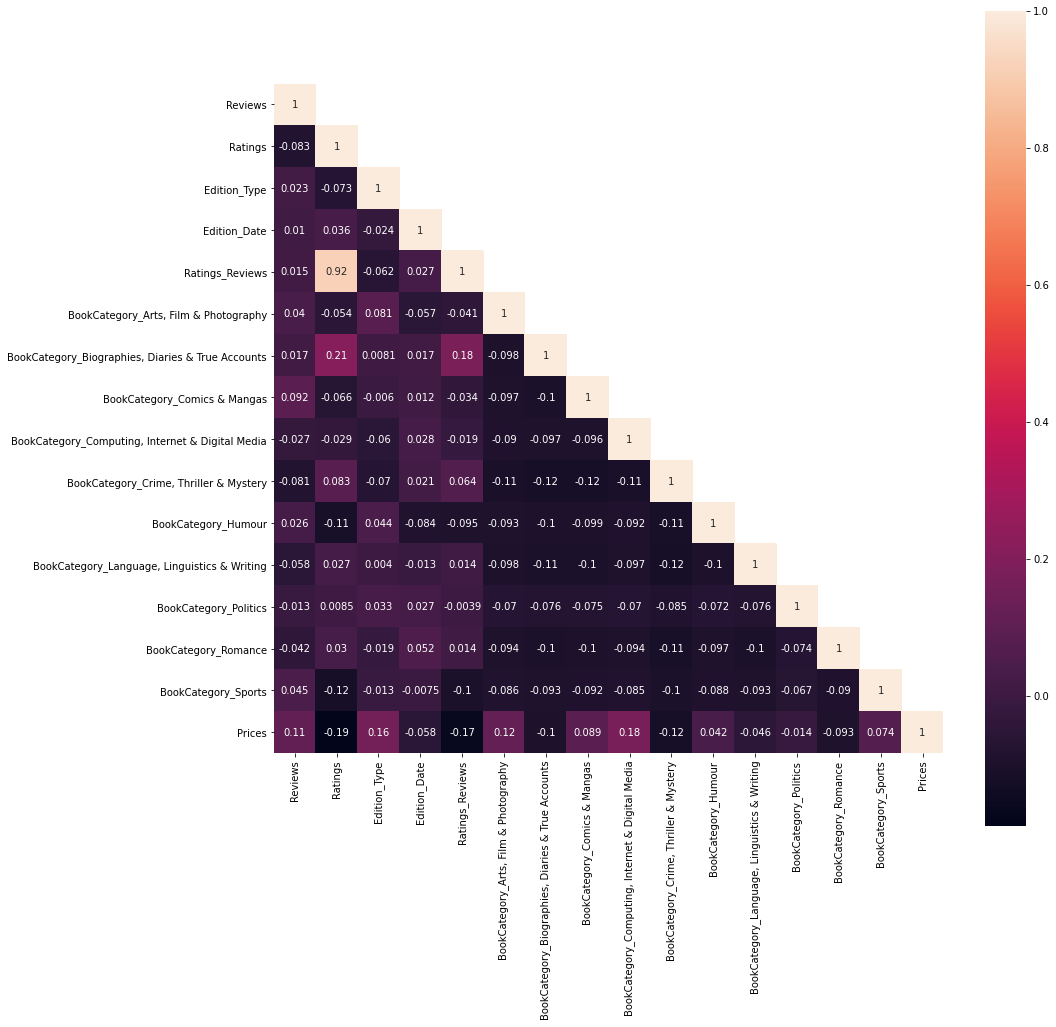

In [262]:
plt.figure(figsize=(15,15))
mask=np.array(train_corr)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(train_corr,mask=mask,vmax=1.0,square=True,annot=True)
plt.show()

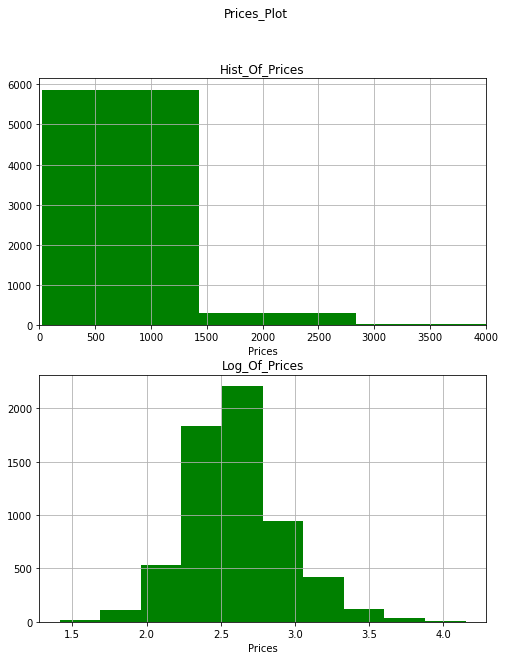

In [263]:
#Target Feature
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(8,10))
ax1.set_title('Hist_Of_Prices')
ax1.hist(train.Prices,color='g')
ax1.set_xlabel('Prices')
ax1.set_xlim([0,4000])
ax1.grid('True')
ax2.set_title('Log_Of_Prices')
ax2.hist(np.log10(train.Prices+1),color='g')
ax2.set_xlabel('Prices')
ax2.grid('True')
plt.suptitle('Prices_Plot')
plt.show()

In [264]:
y_train_log=np.log10(train.Prices.values+1)
y_train_log[:10]

array([2.34439227, 2.30948112, 2.47712125, 2.25767857, 2.98525578,
       2.95472479, 2.35218252, 2.92272546, 2.1172713 , 2.84260924])

In [265]:
#Custom Metric Scoring
def custom_metric(y,pre):
    y_pre=(10**pre)-1
    b=1-np.sqrt(np.square(np.log10(y_pre+1)-np.log10(y+1)).mean())
    return round(b,3)

In [266]:
#Scaling
scaler=sklearn.preprocessing.StandardScaler()
scaler.fit(data)
train=scaler.transform(train.drop('Prices',axis=1))
test=scaler.transform(test)
print('Train: ',train.shape,'\n\n','Test: ',test.shape)

Train:  (6237, 15) 

 Test:  (1560, 15)


In [267]:
 seed=42
pca=PCA(n_components=2,random_state=42)
pca.fit(train)
z=pca.transform(train)
pca.explained_variance_ratio_

array([0.13806379, 0.08354371])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


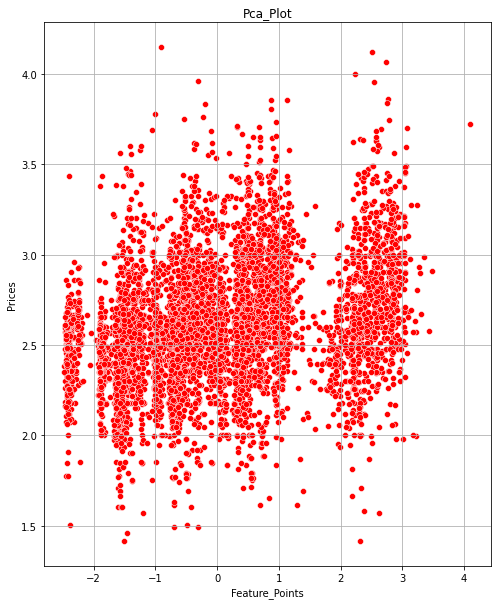

In [268]:
 #Plot of Data
plt.figure(figsize=(8,10))
sns.scatterplot(z[:,0],y_train_log,color='r')
plt.grid('True')
plt.xlabel('Feature_Points')
plt.ylabel('Prices')
plt.title('Pca_Plot')
plt.show()

In [269]:
#Polynomial Features
poly=PolynomialFeatures(degree=2,include_bias=False)
p_train=poly.fit_transform(train)
p_test=poly.transform(test)
p_train.shape

(6237, 135)

LINEAR REGRESSION

In [270]:
#Linear Regression
lin_reg=LinearRegression()
lin_reg.fit(train,y_train_log)
lin_pre=cross_val_predict(lin_reg,train,y_train_log,cv=5)
lin_pre[:5]

array([2.46532542, 2.44978972, 2.68608249, 2.44361417, 2.9453793 ])

In [271]:
custom_metric(y_train,lin_pre)

0.709

LASSO REGRESSION

In [272]:
#Lasso Regression
lasso=Lasso()
lasso_pre=cross_val_predict(lasso,p_train,y_train_log,cv=5)
lasso_pre[:5]

array([2.60650047, 2.60650047, 2.60650047, 2.60650047, 2.60650047])

In [273]:
custom_metric(y_train,lasso_pre)

0.668

DECISION TREE

In [274]:
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(train,y_train_log)
tree_pre=cross_val_predict(tree_reg,train,y_train_log,cv=5)
tree_pre[:5]

array([2.67024585, 2.48144263, 2.92737036, 2.26239272, 3.56181666])

In [275]:
custom_metric(y_train,tree_pre)

0.609

GRADIENT BOOSTING

In [276]:
grad_reg=GradientBoostingRegressor(random_state=42,max_leaf_nodes=75,min_samples_split=20,min_samples_leaf=5,n_estimators=300)
grad_reg.fit(train,y_train_log)
grad_pre=cross_val_predict(grad_reg,train,y_train_log,cv=5)

In [277]:
custom_metric(y_train,grad_pre)

0.723

RANDOM FOREST

In [278]:
 forest_reg=RandomForestRegressor(random_state=42,max_leaf_nodes=75,min_samples_split=20,min_samples_leaf=5,n_estimators=100)
forest_reg.fit(train,y_train_log)
forest_pre=cross_val_predict(forest_reg,train,y_train_log,cv=5)

In [279]:
custom_metric(y_train,forest_pre)

0.719

SUPPORT VECTORS REGRESSOR

In [280]:
svm_reg=SVR(kernel='rbf')
svm_reg.fit(train,y_train_log)
svm_pre=cross_val_predict(svm_reg,train,y_train_log,cv=5)
svm_pre[:5]

array([2.45306888, 2.44215069, 2.75513849, 2.40935997, 3.15375352])

In [281]:
custom_metric(y_train,svm_pre)

0.715

VOTING ENSEMBLE REGRESSOR

In [282]:
from sklearn.ensemble import *

In [283]:
vote_reg=VotingRegressor(estimators=[('Linear_Reg',lin_reg),('Svm_Reg',svm_reg),('Forest_Reg',forest_reg),('Grad_Reg',grad_reg)])
vote_reg.fit(train,y_train_log)

VotingRegressor(estimators=[('Linear_Reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('Svm_Reg',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('Forest_Reg',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   ma...
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                               

In [284]:
 #Preparing Submission File
fh=pd.read_excel('/content/gdrive/MyDrive/Sample_Submission.xlsx')
sub_file=fh
sub_file['Price']=(10**vote_reg.predict(test))
fh=sub_file.to_excel('/content/gdrive/MyDrive/Books_vote_Reg.xlsx',index=False)
sub_file

,Price
0,300.417943
1,941.680177
2,370.821042
3,604.517734
4,316.437361
...,...
1555,676.922998
1556,266.144123
1557,457.150893
1558,278.309193
